<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/0119_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

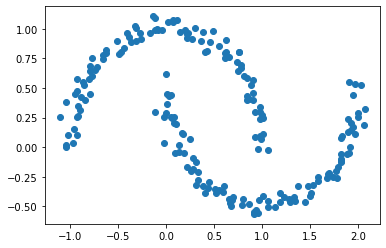

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
km = KMeans(n_clusters=2, random_state=42)
# km = km.fit(X)
# ykm = km.predict(X)
km_pred = km.fit_predict(X)

db = DBSCAN(eps=0.2, min_samples=5)
db_pred = db.fit_predict(X)

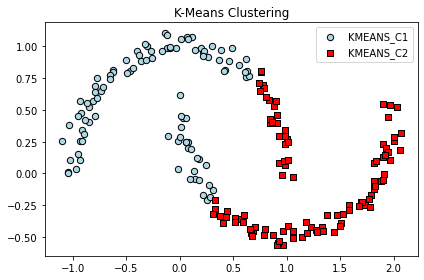

In [ ]:
plt.scatter(X[km_pred == 0, 0], X[km_pred == 0, 1], edgecolors='black', c='lightblue', marker='o',
            s=40, label='KMEANS_C1')
plt.scatter(X[km_pred == 1, 0], X[km_pred == 1, 1], edgecolors='black', c='red', marker='s',
            s=40, label='KMEANS_C2')
plt.legend()
plt.title("K-Means Clustering")
plt.tight_layout()
plt.show()

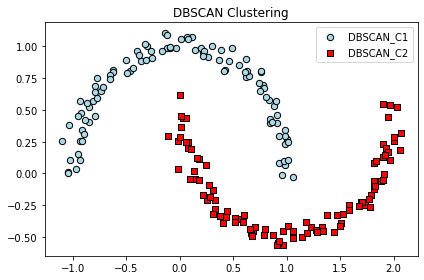

In [ ]:
plt.scatter(X[db_pred == 0, 0], X[db_pred == 0, 1], edgecolors='black', c='lightblue', marker='o',
            s=40, label='DBSCAN_C1')
plt.scatter(X[db_pred == 1, 0], X[db_pred == 1, 1], edgecolors='black', c='red', marker='s',
            s=40, label='DBSCAN_C2')
plt.legend()
plt.title("DBSCAN Clustering")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [ ]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [ ]:
result_df = df.copy()
result_df["label"] = km.labels_
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0


In [ ]:
result_df.groupby("label").mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.325203,44.154472,49.829268,0.406504
1,32.692308,86.538462,82.128205,0.461538
2,40.394737,87.000000,18.631579,0.526316


In [ ]:
result_df['label'].value_counts()

0    123
1     39
2     38
Name: label, dtype: int64

In [ ]:
distance = []

for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    distance.append(km.inertia_)

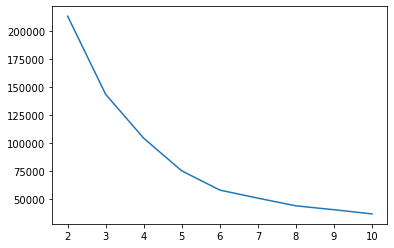

In [ ]:
sns.lineplot(x=range(2, 11), y=distance);

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefs = []

for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    silhouette_coefs.append(silhouette_score(df, km.labels_))

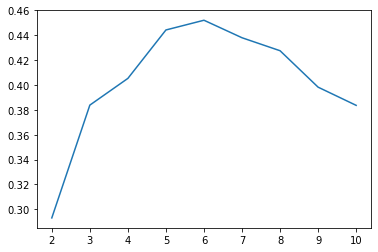

In [ ]:
sns.lineplot(x=range(2, 11), y= silhouette_coefs);

In [ ]:
km = KMeans(n_clusters=6)
km.fit(df)
result_df = df.copy()
result_df['label'] = km.labels_
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,5
2,21,15,81,1,4
3,20,16,6,0,5
4,23,16,77,0,4
5,31,17,40,0,5


In [ ]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,41.685714,88.228571,17.285714,0.571429
1,27.000000,56.657895,49.131579,0.342105
2,56.340909,53.704545,49.386364,0.431818
3,32.692308,86.538462,82.128205,0.461538
4,25.272727,25.727273,79.363636,0.409091
5,44.318182,25.772727,20.272727,0.409091


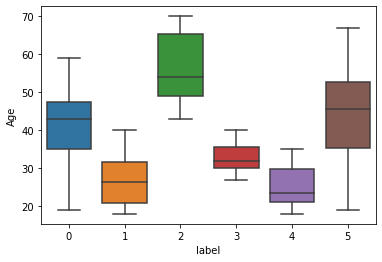

In [ ]:
sns.boxplot(x='label', y='Age', data=result_df);

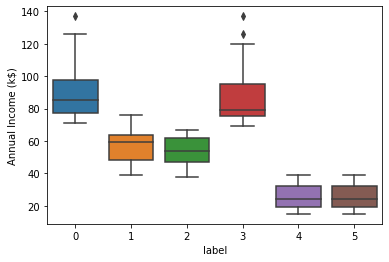

In [ ]:
sns.boxplot(x='label', y='Annual Income (k$)', data=result_df);

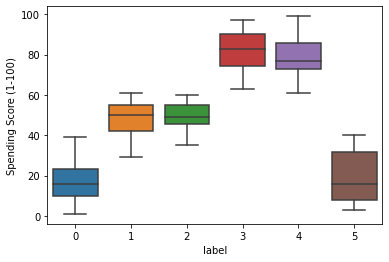

In [ ]:
sns.boxplot(x='label', y='Spending Score (1-100)', data=result_df);